# Исследование игрового рынка

**Целью проекта** является определить основные закономерности, влияющие на успешноcть игры, для определения потенциально популярных продуктов и планирования рекламных кампаний.

Для выполнения цели были поставлены следующие задачи:
    
    - изучить датасет;
    - провести предобработку данных;
    - построить распределение игр по году выпуска;
    - определить актуальный период для рассмотрения даннных;
    - определить потенциально прибыльные платформы;
    - определить влияние оценок критиков и пользователей на продажи по различным платформам;
    - определить потенциально прибыльные жанры;
    - построить портреты пользователей регионов EU, NA , JP;
    - проверить гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - проверить гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

## Изучение датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

Проведем проверку на наличие явных дубликатов.

In [5]:
data.duplicated().sum()

0

Приведем названия столбцов к нижнему регистру.

In [6]:
data.rename(str.lower, axis='columns',inplace=True)

Преобразуем столбцы year_of_release, critic_score к типу int, user_scroe к типу float:

In [7]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди уникальных значений столбца присутсвует значение "tbd" (означает "подлежит уточнению").

In [8]:
data.query('user_score == "tbd"').user_score.count()

2424

Приведем данные пользовательских оценок к типу float.

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce',downcast ='float')

In [10]:
data[data['user_score'] == 'tbd']['user_score'].sum()

0.0

In [11]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7], dtype=float32)

Убедимся, что в столбце critic_score только целочисленные значения оценок.

In [12]:
data[(data['critic_score'] % 1 != 0) & (data['critic_score'].isna() == False)]['critic_score'].count()

0

Приведем данные столбцов year_of_release и critic_score к типу Int.

In [13]:
data = data.astype({'year_of_release':'Int64','critic_score' :'Int64'})

Пропуски обнаружены в столбцах critic_scorerating, user_score, year_of_release. Пропуски в столбце 

In [14]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
user_score,54.600000
critic_score,51.300000
rating,40.500000
year_of_release,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Больше всего пропусков в столбце с данными оценки критиков (порядка 51 процента), оценки пользователей и рейтинга от организации ESRB.

Пропусков в столбце year_of_release 1.6 процента, удалим их.

In [15]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Пропусков в столбцах user_score и critic_score значительное количество, но заполнять их средним или медианным значением по платформе или по жанру может быть не совсем корректно. Оставим эти столбцы без изменений.

Пропуски могут быть вызваны тем, что далеко не на все игры выходят обзоры критиков. На довольно старые игры или на некоторые старые платформы могут быть пропуски в оценках пользователей, в связи с отсутсвием соответствующих инструментов для сбора таких данных. 

Пропуски в столбце rating, оценка организации ESRB, могут быть вызваны тем, что на тот момент времени организации просто не существовало (основана в 1994 году) или она была далеко не так известна, чтобы разработчики отправляли туда свою игру на оценку.

In [16]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Из возможных вариантов заполнения пропусков можно представить вариант заполнения пропусков значением «RP» («Rating Pending» — «Рейтинг ожидается») или вводить свое обозначение «nR» («no Rating»). В данном проекте было принято решение не заполнять пропуски в столбце rating.

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ

Построим распределение игр по году выпуска.

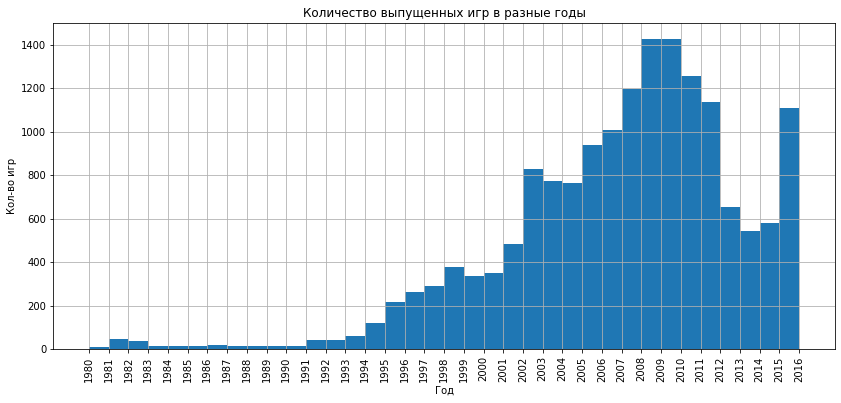

In [18]:
plot = data['year_of_release'].plot(kind='hist', bins=36, range=(1980,2016), title='Количество выпущенных игр в разные годы', grid=True,xticks=range(1980,2017,1),figsize=(14,6),rot = 90)
plot.set_xlabel('Год')
plot.set_ylabel('Кол-во игр')
plt.show()

**Вывод:** Рост количества выпускаемых игр наблюдается с 1994 года. Пиковые значения наблюдались в 2008 и 2009 годах. Наблюдается значительный рост в 2016 году по сравнению с предыдущим.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [19]:
pivot_platform = data.pivot_table(index='platform', values='total_sales',aggfunc='sum')#.sort_values(by='total_sales',ascending=False)
pivot_platform.sort_values(by='total_sales',ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


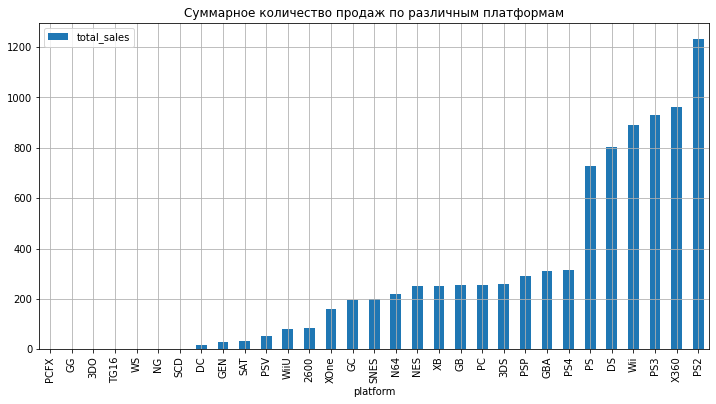

In [20]:
pivot_platform.sort_values(by='total_sales').plot(kind='bar', y='total_sales', title='Суммарное количество продаж по различным платформам', grid=True,figsize=(12,6))
plt.show()

**Вывод:** На текущий рассматриваемый момент по суммарным продажам игр за все время лидирует консоль PS2 (она достаточно долго поддерживалась производителем, но на текущий момент давно не производится). Второе и третье места делят Xbox360 и PS3, еще недавно актуальные поколения консолей. Далее DS и Wii. Актуальная на рассматриваемый момент PS4 еще только набирает обороты по продажам. 

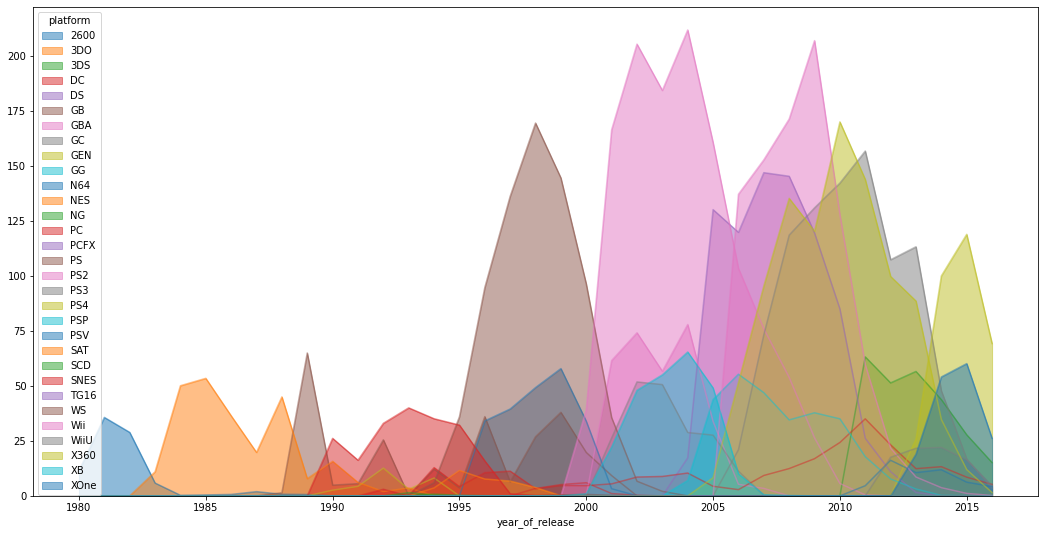

In [21]:
pivot_1 = data.pivot_table(index=['year_of_release'],values='total_sales',columns='platform',aggfunc='sum')
pivot_1.plot(kind='area',figsize=(18,9),stacked=False)
plt.show()

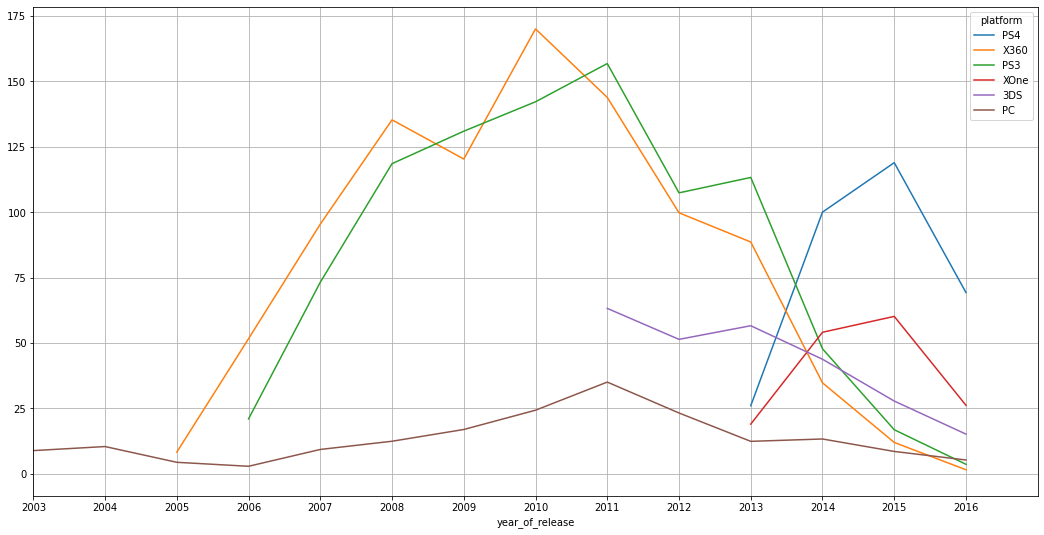

In [22]:
actual_platforms = ['PS4','X360','PS3','XOne','3DS','PC']
pivot_1[actual_platforms].plot(xlim=(2003,2017),xticks=range(2003,2017,1),figsize=(18,9),grid=True)
plt.show()

**Вывод:** Актуальность платформы составляет порядка 5-6 лет. PS4 и XboxOne показали просадки в продажах в 2016 году, возможно из-за неполных данных за этот год.

В качестве актуального выберем данные за период с 2014 года.

In [23]:
actual_data = data.query('year_of_release >= 2014')

Выберем пять потенциально прибыльных платформ.

In [24]:
top_platforms = actual_data.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False).head(5)
top_platforms

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Построим «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам.

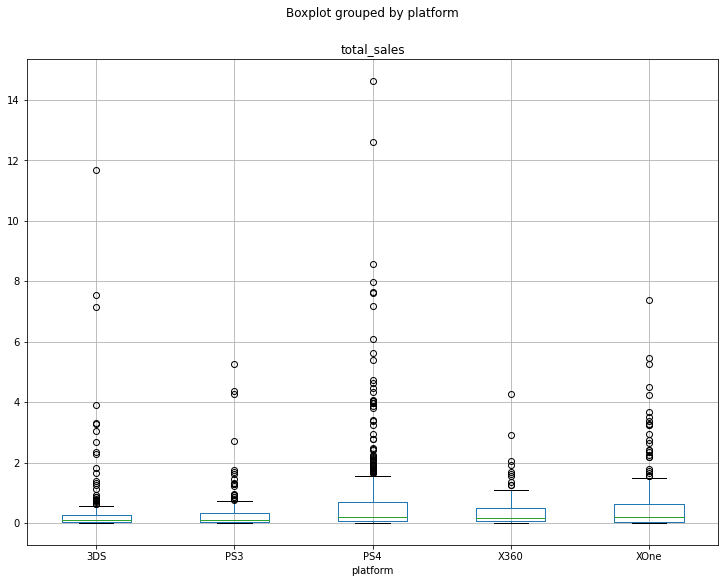

In [25]:
plot_2 = actual_data.loc[(actual_data['platform'].isin(top_platforms.index.to_list()))].boxplot(column='total_sales',by='platform',grid=True,figsize=(12,9))
plt.show()

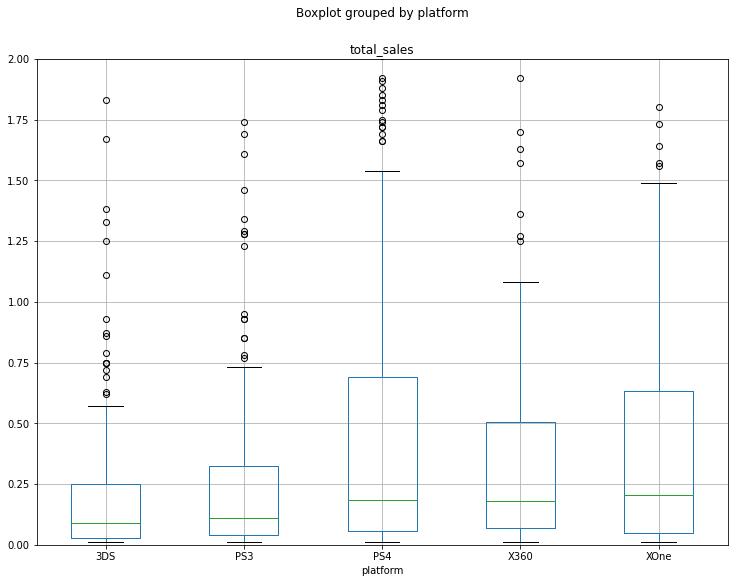

In [26]:
plot_2 = actual_data.loc[(actual_data['platform'].isin(top_platforms.index.to_list()))].boxplot(column='total_sales',by='platform',grid=True,figsize=(12,9))
plot_2.set_ylim(0,2)
plt.show()

**Вывод:** Медианные значения продаж у топовых платформ лежит в диапазоне 0,15 до 0,25 млн за игру.
Выбросы наблюдаются у всех платформ, в отдельных случаях достигают порядка 15 млн. Показатели у 3DS ниже остальных.

Определим влияние оценок критиков и пользователей на продажи на примере Xbox360.

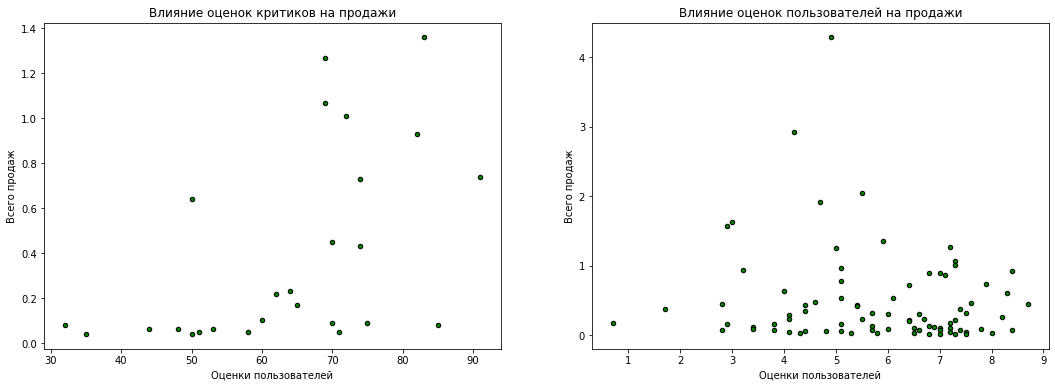

In [27]:
platform_x = actual_data.query('platform == "X360"')

fig, ax = plt.subplots(1, 2, figsize=(18,6))
platform_x.plot(kind='scatter',x='critic_score',y='total_sales',color='Green',ec='black',title='Влияние оценок критиков на продажи',xlabel='Оценки пользователей',ylabel='Всего продаж',ax=ax[0])
platform_x.plot(kind='scatter',x='user_score',y='total_sales',color='Green',ec='black',title='Влияние оценок пользователей на продажи',xlabel='Оценки пользователей',ylabel='Всего продаж',ax=ax[1])
plt.show()

In [28]:
platform_x.corr().style.background_gradient('Greens')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.224167,-0.195040,-0.195843,-0.237644,nan,-0.252575,-0.238375
na_sales,-0.224167,1.000000,0.588317,0.151322,0.978530,0.539778,-0.133585,0.944965
eu_sales,-0.195040,0.588317,1.000000,0.090998,0.737452,0.443965,-0.106952,0.820443
jp_sales,-0.195843,0.151322,0.090998,1.000000,0.154383,0.435430,0.089151,0.148872
other_sales,-0.237644,0.978530,0.737452,0.154383,1.000000,0.544409,-0.137688,0.990365
critic_score,nan,0.539778,0.443965,0.435430,0.544409,1.000000,0.625309,0.525723
user_score,-0.252575,-0.133585,-0.106952,0.089151,-0.137688,0.625309,1.000000,-0.138445
total_sales,-0.238375,0.944965,0.820443,0.148872,0.990365,0.525723,-0.138445,1.000000


**Вывод:** Для консоли Xbox360 есть положительная корреляция продаж с оценками критиков. Это может быть обусловлено тем, что пользователи прислушиваются к мнению известных критиков, которые часто сопровождают свои оценки детальными обзорами на игры. Корреляция с оценками пользователей довольно низкая.

Соотнесите выводы с продажами игр на других платформах.

Корреляция с продажами для платформы: PS4

critic_score    0.402661
user_score     -0.040132
Name: total_sales, dtype: float64 

Корреляция с продажами для платформы: XOne

critic_score    0.428677
user_score     -0.070384
Name: total_sales, dtype: float64 

Корреляция с продажами для платформы: 3DS

critic_score    0.314117
user_score      0.215193
Name: total_sales, dtype: float64 

Корреляция с продажами для платформы: PS3

critic_score    0.446575
user_score     -0.166761
Name: total_sales, dtype: float64 

Корреляция с продажами для платформы: X360

critic_score    0.525723
user_score     -0.138445
Name: total_sales, dtype: float64 



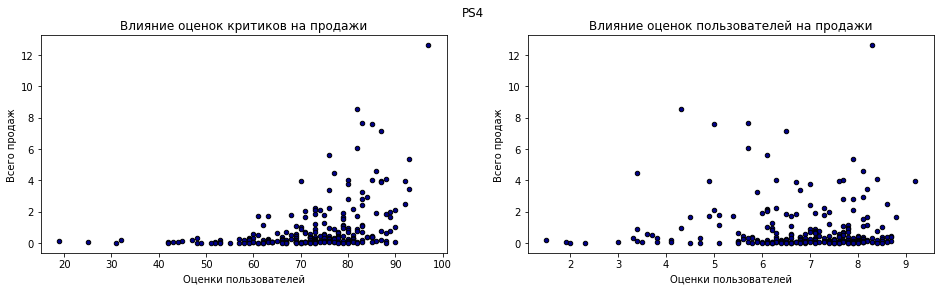

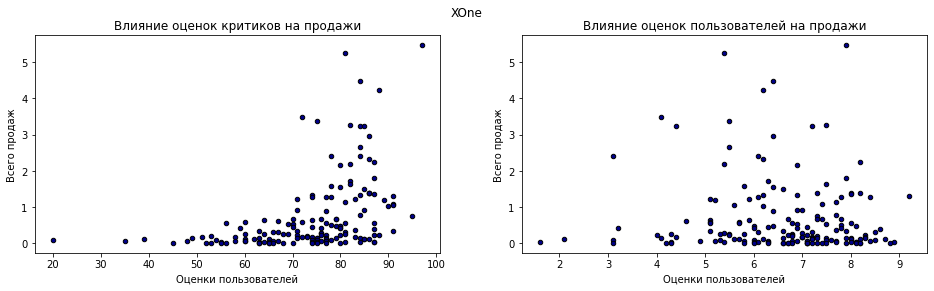

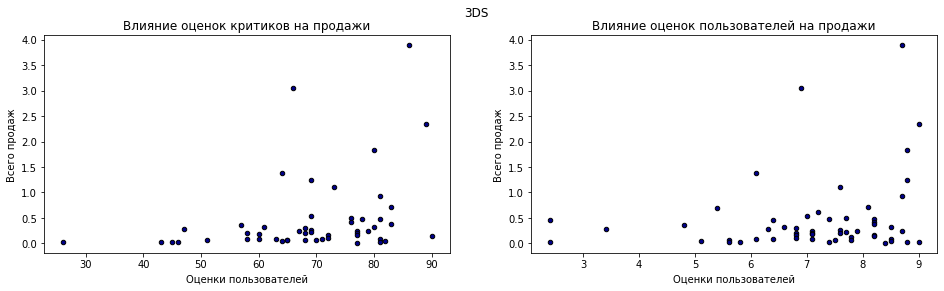

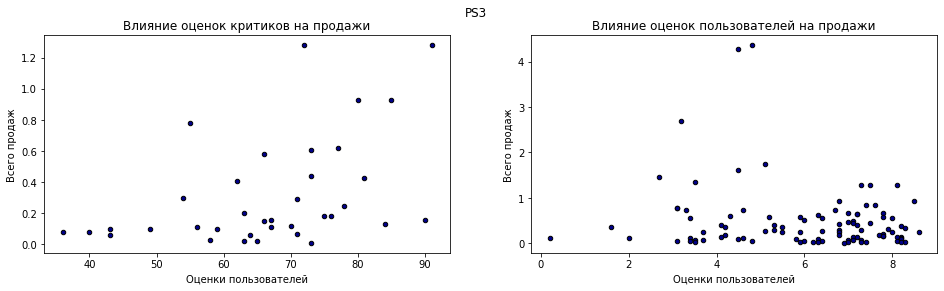

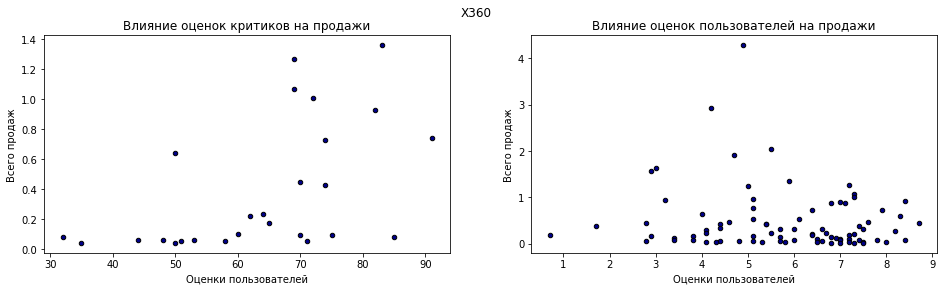

In [29]:
i = 0

for platforms in top_platforms.index.to_list():
    print(f'Корреляция с продажами для платформы: {platforms}\n')
    print(actual_data.query('platform == @platforms').corr().loc['total_sales','critic_score':'user_score'],'\n')
    fig, ax = plt.subplots(1, 2, figsize=(16,4))
    actual_data.query('platform == @platforms').plot(kind='scatter',x='critic_score',y='total_sales',color='DarkBlue',ec='black',title='Влияние оценок критиков на продажи',xlabel='Оценки пользователей',ylabel='Всего продаж',ax=ax[i])
    actual_data.query('platform == @platforms').plot(kind='scatter',x='user_score',y='total_sales',color='DarkBlue',ec='black',title='Влияние оценок пользователей на продажи',xlabel='Оценки пользователей',ylabel='Всего продаж',ax=ax[i+1])
    plt.suptitle(platforms)
plt.show()

**Вывод:** Выводы о корреляции оценок пользователей и критиков на продажи для других платформ подобны. Оценки критиков оказывают большее влияние на продажи, чем пользовательские оценки.

Потроим распределение игр по жанрам.

In [30]:
#pivot_genre = actual_data.pivot_table(index='genre',values=['name','total_sales'],aggfunc={'name':'count','total_sales':'sum'}).sort_values(by='total_sales',ascending=False)
#pivot_genre.rename(columns={'name':'Кол-во игр','total_sales':'Всего продаж,млн'},inplace=True)

pivot_genre = actual_data.pivot_table(index='genre',values=['total_sales'],aggfunc=['count','sum','mean','median'])#.sort_values(by='count',ascending=False)
pivot_genre.columns = ['Кол-во игр','Всего продаж,млн','Средние продажи игры','Медианные продажи игры']

pivot_genre.sort_values(by='Кол-во игр',ascending=False)

,Кол-во игр,"Всего продаж,млн",Средние продажи игры,Медианные продажи игры
genre,,,,
Action,619,199.36,0.322068,0.090
Role-Playing,221,101.44,0.459005,0.110
Adventure,185,17.55,0.094865,0.030
Sports,161,109.48,0.680000,0.180
Shooter,128,170.94,1.335469,0.515
Misc,113,37.55,0.332301,0.090
Racing,69,27.52,0.398841,0.090
Fighting,60,28.22,0.470333,0.125
Simulation,44,13.13,0.298409,0.100


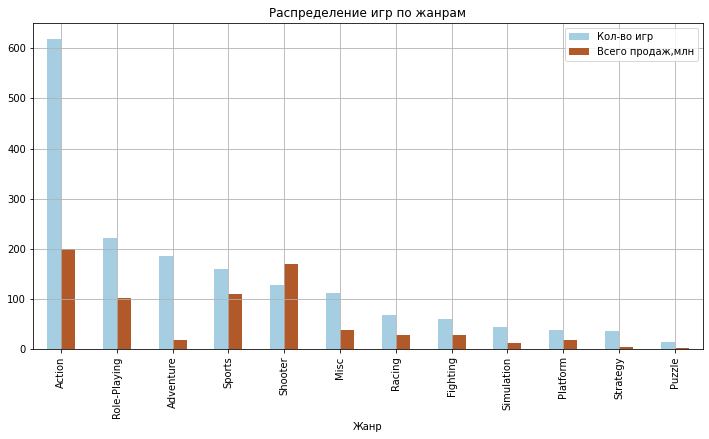

In [31]:
plot_3 = pivot_genre.sort_values(by='Кол-во игр',ascending=False).plot(kind='bar',y=['Кол-во игр','Всего продаж,млн'],figsize=(12,6),grid=True,colormap='Paired')
plot_3.set_title('Распределение игр по жанрам')
plot_3.set_xlabel('Жанр')
plt.show()

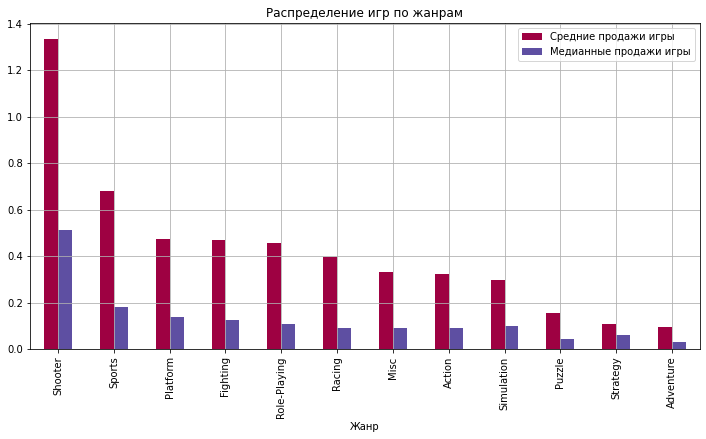

In [32]:
plot_4 = pivot_genre.sort_values(by='Средние продажи игры',ascending=False).plot(kind='bar',y=['Средние продажи игры','Медианные продажи игры'],figsize=(12,6),grid=True,colormap='Spectral')
plot_4.set_title('Распределение игр по жанрам')
plot_4.set_xlabel('Жанр')
plt.show()

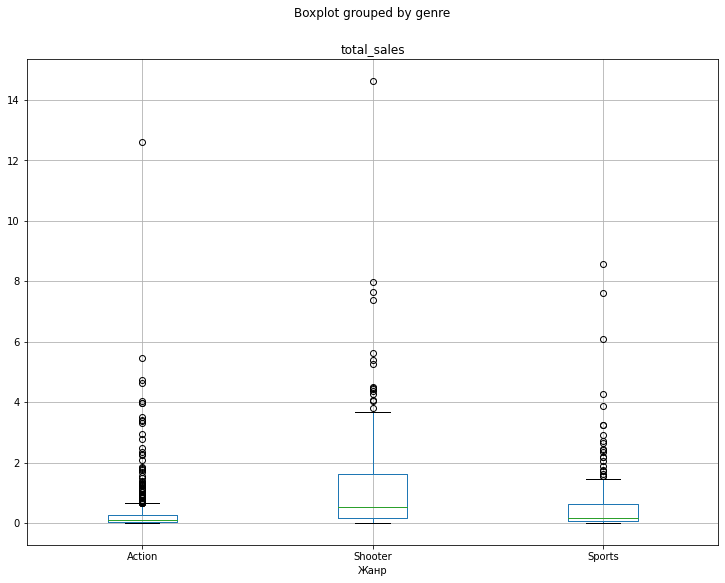

In [33]:
plot_5 = actual_data.loc[actual_data['genre'].isin(['Shooter','Action','Sports'])].boxplot(column='total_sales',by='genre',grid=True,figsize=(12,9))
plot_5.set_xlabel('Жанр')
plt.show()

**Вывод:** Больше всего игр по количеству и продажам в жанре Action. Далее по суммарным продажам идет жанр Sports. По суммарным продажам третье место занимают игры в жанре Shooter, однако по количеству выпущенных игр жанр Misc. Достаточно большое количество игр в жанре Adventure, но суммарные продажи довольно низкие.

Жанр Shooter по средним и медианным значениям продаж занимает лидирующие положение. Следовательно отдельно взятая игра в жанре Shooter по средним показателям продается лучше. Второе место занимает жанр Sports. Жанр Action по средним продажам занимает лишь 8ое место, по всей видимости такие высокие суммарные продажи достигаются засчет количества игр в этом жанре.

## Портреты пользователей по отдельным регионам

Потроим портреты пользователей разных регионов в зависимости от платформы.

In [34]:
eu_users = actual_data.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
na_users = actual_data.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
jp_users = actual_data.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

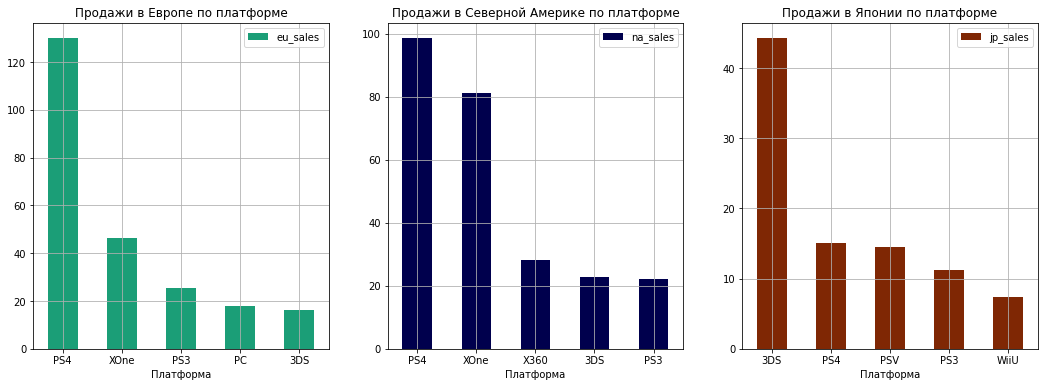

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

eu_users.plot(kind='bar',grid=True,colormap='Dark2',title='Продажи в Европе по платформе',xlabel='Платформа',rot=0, ax=ax[0])
na_users.plot(kind='bar',grid=True,colormap='seismic',title='Продажи в Северной Америке по платформе',xlabel='Платформа',rot=0,ax=ax[1])
jp_users.plot(kind='bar',grid=True,colormap='Oranges_r',title='Продажи в Японии по платформе',xlabel='Платформа',rot=0,ax=ax[2])
plt.show()

Потроим портреты пользователей разных регионов в зависимости от жанров.

In [36]:
eu_genre = actual_data.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
na_genre = actual_data.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
jp_genre = actual_data.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

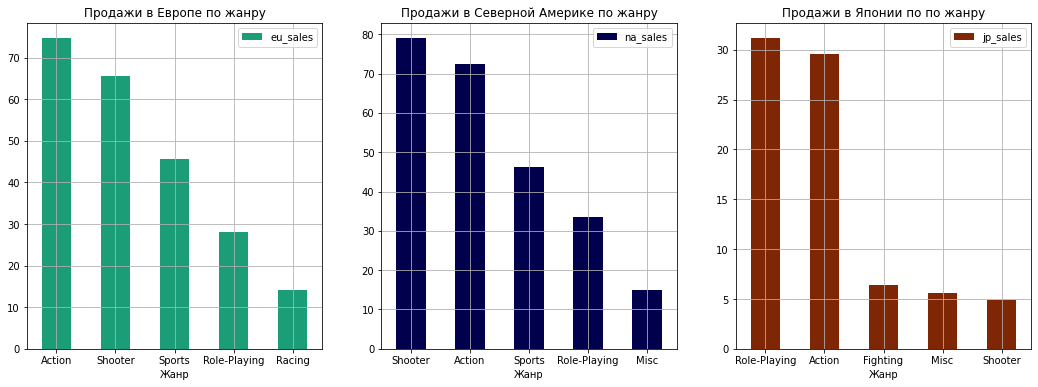

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

eu_genre.plot(kind='bar',grid=True,colormap='Dark2',title='Продажи в Европе по жанру',xlabel='Жанр',rot=0, ax=ax[0])
na_genre.plot(kind='bar',grid=True,colormap='seismic',title='Продажи в Северной Америке по жанру',xlabel='Жанр',rot=0,ax=ax[1])
jp_genre.plot(kind='bar',grid=True,colormap='Oranges_r',title='Продажи в Японии по по жанру',xlabel='Жанр',rot=0,ax=ax[2])
plt.show()

Потроим портреты пользователей разных регионов в зависимости от рейтинга ESRB.

Расшифровки рейтингов организации Entertainment Software Rating Board (**ESRB**):

**«EC» («Early childhood»)** — «Для детей младшего возраста»

**«E» («Everyone»)** — «Для всех»

**«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»

**«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет.

**«M» («Mature»)** — «Для взрослых»

**«AO» («Adults Only 18+»)** — «Только для взрослых»

**«RP» («Rating Pending»)** — «Рейтинг ожидается»

**«RP 17+» («Rating Pending»)** — «Рейтинг ожидается - примерно 17+»

In [38]:
eu_rating = actual_data.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
na_rating= actual_data.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
jp_rating = actual_data.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

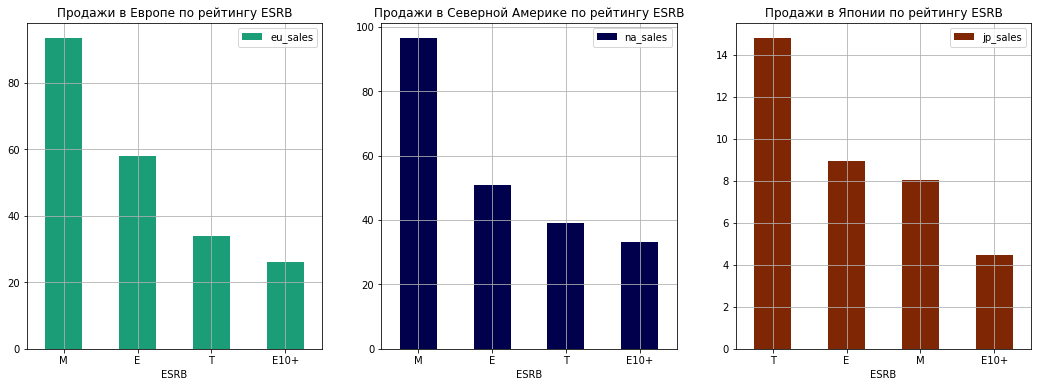

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

eu_rating.plot(kind='bar',grid=True,colormap='Dark2',title='Продажи в Европе по рейтингу ESRB',xlabel='ESRB',rot=0, ax=ax[0])
na_rating.plot(kind='bar',grid=True,colormap='seismic',title='Продажи в Северной Америке по рейтингу ESRB',xlabel='ESRB',rot=0,ax=ax[1])
jp_rating.plot(kind='bar',grid=True,colormap='Oranges_r',title='Продажи в Японии по рейтингу ESRB',xlabel='ESRB',rot=0,ax=ax[2])
plt.show()

**Вывод:** По платформам в Европе первые и вторые места занимают PS4 и XboxOne соответственно. В Европе помимо консолей отдают предпочтение PC. В Японии большее предпочтение отдают портативным консолям, причем весь топ 5 платформ это "отечественные" для них консоли компаний Nintendo и Sony.

В Европе на первом месте игры в жанре Action, в Северной Америке больше отдают предпочтение Shooter. В Японии ситуация отличается первое место занимает жанр Role-Playing, на третьем месте Fighting. Жанр Shooter и Sports не так популярны. 

По рейтингу ESRB распределение продаж в Европе и Северной Америке схожие, явно преобладают игры с рейтингом «M» («Mature»). В Японии ситуация отличается преобладают игры с рейтингом «T» («Teen»), а игры с категорией «M» занимают лишь третье место.

## Статистический анализ

Зададимся значением alpha.

In [40]:
alpha = 0.05

In [41]:
def hypotesis_test(alpha,sample_1,sample_2):
    results = st.ttest_ind(sample_1, sample_2, equal_var=False,nan_policy='omit')
    print(f'Среднее значение первой выборки : ', sample_1.mean())
    print('Среднее значение второй выборки: ', sample_2.mean())
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")

    else:
        print("Не получилось отвергнуть нулевую гипотезу") 

Выдвинем нулевую и альтернативную гипотезы.

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [42]:
xone_score = actual_data[actual_data['platform'] == 'XOne']['user_score']
pc_score = actual_data[actual_data['platform'] == 'PC']['user_score']

In [43]:
hypotesis_test(alpha,xone_score,pc_score)

Среднее значение первой выборки :  6.5945454
Среднее значение второй выборки:  6.2983603
p-значение:  0.11601379428432244
Не получилось отвергнуть нулевую гипотезу


Выдвинем нулевую и альтернативную гипотезы.

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: средние пользовательские рейтинги жанров Action и Sports разные.    

In [44]:
action_score = actual_data[actual_data['genre'] == 'Action']['user_score']
sports_score = actual_data[actual_data['genre'] == 'Sports']['user_score']

In [45]:
hypotesis_test(alpha,action_score,sports_score)

Среднее значение первой выборки :  6.760606
Среднее значение второй выборки:  5.2251973
p-значение:  1.1825796838209195e-14
Отвергаем нулевую гипотезу


**Вывод:** 




Нулевую гипотезу о том средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть. В случае пользовательских рейтингов жанров придерживаемся альтернативной гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные.


## Общий вывод

Рост количества выпускаемых игр наблюдается с 1994 года. Пиковые значения наблюдались в 2008 и 2009 годах. Наблюдается значительный рост в 2016 году по сравнению с предыдущим.

На текущий рассматриваемый момент по суммарным продажам игр за все время лидирует консоль PS2. Второе и третье места делят Xbox360 и PS3, еще недавно актуальные поколения консолей. Далее DS и Wii. Актуальная на рассматриваемый момент PS4 еще только набирает обороты по продажам.

Основной период жизни платформы порядка 5-6 лет.

Медианные значения продаж у топовых платформ лежит в диапазоне 0,15 до 0,25 млн за игру. Выбросы наблюдаются у всех платформ, в отдельных случаях достигают порядка 15 млн. Показатели у 3DS ниже остальных.

Для консолей есть корреляция продаж с оценками критиков. Это может быть обусловлено тем, что пользователи прислушиваются к мнению известных критиков, которые часто сопровождают свои оценки детальными обзорами на игры. Корреляция с оценками пользователей довольно низкая. Оценки критиков оказывают большее влияние на продажи, чем пользовательские оценки.

Больше всего игр по количеству и продажам в жанре Action. Далее по суммарным продажам идет жанр Sports. По суммарным продажам третье место занимают игры в жанре Shooter, однако по количеству выпущенных игр жанр Misc. Достаточно большое количество игр в жанре Adventure, но суммарные продажи довольно низкие.

Жанр Shooter по средним и медианным значениям продаж занимает лидирующие положение. Следовательно отдельно взятая игра в жанре Shooter по средним показателям продается лучше. Второе место занимает жанр Sports. Жанр Action по средним продажам занимает лишь 8ое место, по всей видимости такие высокие суммарные продажи достигаются засчет количества игр в этом жанре.

По платформам в Европе первые и вторые места занимают PS4 и XboxOne соответственно. В Европе помимо консолей отдают предпочтение PC. В Японии большее предпочтение отдают портативным консолям, причем весь топ 5 платформ это "отечественные" для них консоли компаний Nintendo и Sony.

В Европе на первом месте игры в жанре Action, в Северной Америке больше отдают предпочтение Shooter. В Японии ситуация отличается первое место занимает жанр Role-Playing, на третьем месте Fighting. Жанр Shooter и Sports не так популярны.

По рейтингу ESRB распределение продаж в Европе и Северной Америке схожие, явно преобладают игры с рейтингом «M» («Mature»). В Японии ситуация отличается преобладают игры с рейтингом «T» («Teen»), а игры с категорией «M» занимают лишь третье место.

Нулевую гипотезу о том средние пользовательские рейтинги платформ Xbox One и PC одинаковые не получилось отвергнуть. В случае пользовательских рейтингов жанров придерживаемся альтернативной гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные.